In [1]:
#27.11.2018
from numpy import *
#%pylab inline
from pylab import *
#for ploting 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import AD_module as ad
import numpy as np
import ctypes

In [3]:
clight = 3*1e10

In [4]:
## Before running
## Compile the code with :
# python Python_setup.py build_ext -i -lcfitsio --inplace

# Compute the spectrum of the steady disk and then its total luminosity

In [5]:
Nint = 1500
spec = []
wavelength = []
step_wv = exp(log(1e0/1e-12)/Nint)
for i in range(Nint):
    spec.append(0.0)
    wavelength.append(1e-12*pow(step_wv,i))
    
spec = np.asarray(spec)
wavelength = np.asarray(wavelength)

In [6]:
ad.Spectrum(1.0, wavelength, spec, Nint)

0

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


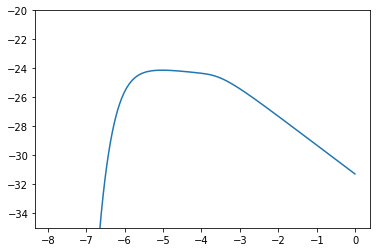

In [7]:
plt.ylim(-35,-20)
plt.plot(log(wavelength)/log(10.0), log(spec)/log(10.0))

In [8]:
summ = 0.0
for i in range(Nint-1):
    summ += 0.5*(spec[i+1]+ spec[i])*(wavelength[i+1]-wavelength[i])
print summ

2.3240100891515516e-28


# plot the plower law with the index of 1/3

In [9]:
def power_law(N, xdata, alpha):
    return N*xdata**(-alpha)

alpha = 0.333333333333
1500


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


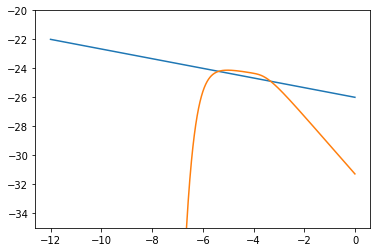

In [10]:
xdata = wavelength
N = 1e-26
alpha = 1.0/3
print 'alpha =', alpha
powerlaw_fun = []

for i in range(0,len(wavelength)):
        powerlaw_fun.append(power_law(N, xdata[i], alpha))

print len(powerlaw_fun)
plt.plot(log(xdata)/log(10),log(powerlaw_fun)/log(10))
#sig = str_exp_fun
plt.ylim(-35,-20)
plt.plot(log(wavelength)/log(10.0), log(spec)/log(10.0))

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


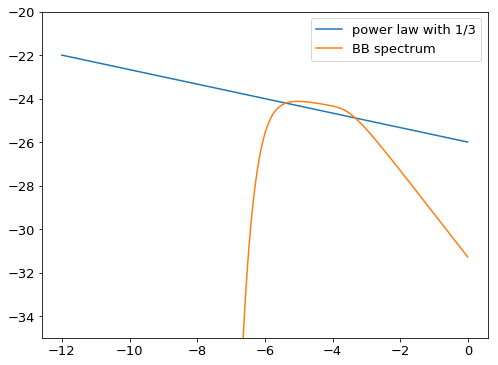

In [11]:
#if I want to save it in pdf
import datetime
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import matplotlib.lines as lns
from numpy.random import normal
#import matplotlib as mpl
#mpl.rcParams['axes.linewidth'] = 2 #set the value globally

font = {'family' : 'normal',
        'weight' : 'normal', #bold',
        'size'   : 13}
matplotlib.rc('font', **font) # it is for the tickness of axis and label
#You can find a full list of available properties on the Customizing matplotlib page.

# Create the PdfPages object to which we will save the pages:
# The with statement makes sure that the PdfPages object is closed properly at
# the end of the block, even if an Exception occurs.
with PdfPages('spectrum_powerlaw_0.33.pdf') as pdf:
    #plt.rc('text', usetex=True)
    plt.figure(figsize=(8, 6))
    plt.plot(log(xdata)/log(10),log(powerlaw_fun)/log(10), label='power law with 1/3')
    plt.plot(log(wavelength)/log(10.0), log(spec)/log(10.0), label='BB spectrum')
    plt.ylim(-35,-20)
    plt.legend(('power law with 1/3', 'BB spectrum'), loc = 0)
    #plt.hist(alpha_obs1, bins=20, histtype='step', color='k')
    #plt.legend(('all data'), loc = 0)
    #plt.vlines(x=-1.5, ymin=0, ymax=80, color="black", linewidth=1, linestyle="--", zorder=-1)
    #plt.text(-1.5, 100, 'IPD', fontsize=20)
    #plt.text(-1.5, 100, 'all data', fontsize=20)
    #plt.ylabel('Flux', size =16)
    #plt.xlabel('Time', size =16)
    ## set axis limits
    #plt.ylim(0, 1)
    #plt.xlim(1500, 3500)
    pdf.savefig()
    #plt.close() #If I don't want to see plot in the screen like below I can open this one

# Plot the illumunated light curve

In [12]:
#Initialization
Ntau = 7
tau_time = [3.0, 6.0, 10.0, 20.0, 40.0, 100.0, 200.0]
tau_time = np.asarray(tau_time)
ratio = [-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]
ratio = np.asarray(ratio)

In [13]:
time_ILC = []
flux_ILC = []
fluxerr_ILC = []
with open('Output_Lstar.txt') as f:
    for line in f:
        data = line.split()
        #print float(data[0])
        time_ILC.append(float(data[0]))
        flux_ILC.append(float(data[1]))
        fluxerr_ILC.append(float(data[2]))
time_ILC = np.asarray(time_ILC)
flux_ILC = np.asarray(flux_ILC)
fluxerr_ILC = np.asarray(fluxerr_ILC)

mean_F = mean(flux_ILC)
print mean_F
#flux_ILC = flux_ILC / mean_F
time_ILC = time_ILC- 5961.730 #time_ILC[0]

2.5120407562500002


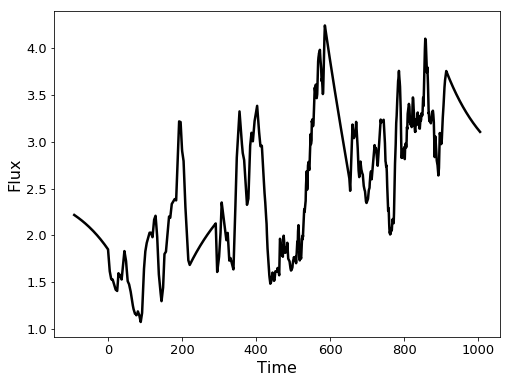

In [14]:
#if I want to save it in pdf
import datetime
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import matplotlib.lines as lns
from numpy.random import normal
#import matplotlib as mpl
#mpl.rcParams['axes.linewidth'] = 2 #set the value globally

font = {'family' : 'normal',
        'weight' : 'normal', #bold',
        'size'   : 13}
matplotlib.rc('font', **font) # it is for the tickness of axis and label
#You can find a full list of available properties on the Customizing matplotlib page.

# Create the PdfPages object to which we will save the pages:
# The with statement makes sure that the PdfPages object is closed properly at
# the end of the block, even if an Exception occurs.
with PdfPages('LC_Output_Lstar_rescaled_no_timeshift.pdf') as pdf:
    #plt.rc('text', usetex=True)
    plt.figure(figsize=(8, 6))
    plt.plot(time_ILC, flux_ILC, 'k', linewidth=2.5)#, label='UVW2 Swift band passes')
    #plt.legend(('UVW2 Swift band passes','rescaled'), loc = 0)
    #plt.hist(alpha_obs1, bins=20, histtype='step', color='k')
    #plt.legend(('all data'), loc = 0)
    #plt.vlines(x=-1.5, ymin=0, ymax=80, color="black", linewidth=1, linestyle="--", zorder=-1)
    #plt.text(-1.5, 100, 'IPD', fontsize=20)
    #plt.text(-1.5, 100, 'all data', fontsize=20)
    plt.ylabel('Flux', size =16)
    plt.xlabel('Time', size =16)
    ## set axis limits
    #plt.ylim(0, 1)
    #plt.xlim(1500, 3500)
    pdf.savefig()
    #plt.close() #If I don't want to see plot in the screen like below I can open this one

# Compute one realization of the disk model for each band

In [15]:
#2) Compute UVW2 LC assuming illuminating source (Flux)
#follow the UVW2 fitted with the acretion disk model
#Filter=np.array([1,1,1,0,1,1])

In [16]:
#ad.AD_py(6,Filter, time, flux, ratio, tau_time, Ntime, Ntau)

In [17]:
t = []
flux0 = []
flux1 = []
flux2 = []
flux3 = []
flux4 = []
flux5 = []
for i in range(0,2000):
    t.append(float(0.5*float(i) + 0.0))
    flux0.append(float(0))
    flux1.append(float(0))
    flux2.append(float(0))
    flux3.append(float(0))
    flux4.append(float(0))
    flux5.append(float(0))
t = np.asarray(t)
flux0 = np.asarray(flux0)
flux1 = np.asarray(flux1)
flux2 = np.asarray(flux2)
flux3 = np.asarray(flux3)
flux4 = np.asarray(flux4)
flux5 = np.asarray(flux5)

# 1- LC of UVW2 with different amplitudes

In [18]:
ad.LightCurve(0, time_ILC, flux_ILC, len(time_ILC), t, flux0, len(t), 1.0)
ad.LightCurve(0, time_ILC, flux_ILC, len(time_ILC), t, flux1, len(t), 10.0)
ad.LightCurve(0, time_ILC, flux_ILC, len(time_ILC), t, flux2, len(t), 100.0)
ad.LightCurve(0, time_ILC, flux_ILC, len(time_ILC), t, flux3, len(t), 1000.0)
#ad.LightCurve(4, time_ILC, flux_ILC, len(time_ILC), t, flux4, len(t), 1.0)
#ad.LightCurve(5, time_ILC, flux_ILC, len(time_ILC), t, flux5, len(t), 1.0)

0

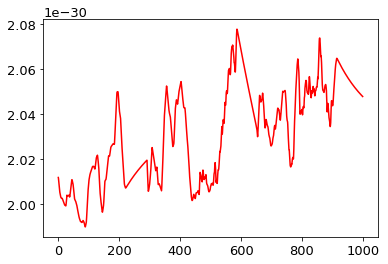

In [19]:
plt.plot(t, flux0, color = "red")
#plt.ylim(1.95e-30, 2.025e-30)

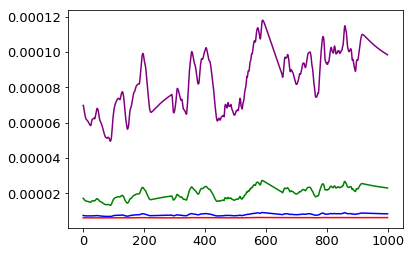

In [20]:
plt.plot(t, flux0*clight*1e14 , color = "red")
plt.plot(t, flux1*clight*1e14 , color = "blue")
plt.plot(t, flux2*clight*1e14 , color = "green")
plt.plot(t, flux3*clight*1e14 , color = "purple")

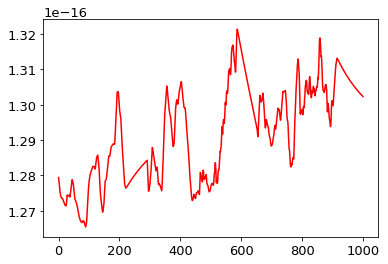

In [21]:
plt.plot(t, flux0*clight*(2120), color = "red")
#plt.ylim(1.24e-16, 1.28e-16)

# 2- LC of all the bands UVW2, UVM2, UVW1, U, B, V

In [22]:
ad.LightCurve(0, time_ILC, flux_ILC, len(time_ILC), t, flux0, len(t), 1.0)
ad.LightCurve(1, time_ILC, flux_ILC, len(time_ILC), t, flux1, len(t), 1.0)
ad.LightCurve(2, time_ILC, flux_ILC, len(time_ILC), t, flux2, len(t), 1.0)
ad.LightCurve(3, time_ILC, flux_ILC, len(time_ILC), t, flux3, len(t), 1.0)
ad.LightCurve(4, time_ILC, flux_ILC, len(time_ILC), t, flux4, len(t), 1.0)
ad.LightCurve(5, time_ILC, flux_ILC, len(time_ILC), t, flux5, len(t), 1.0)

0

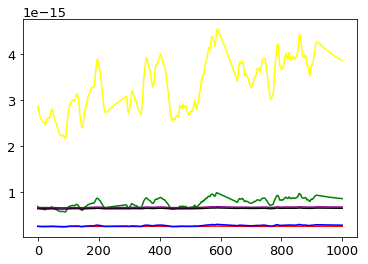

In [23]:
plt.plot(t, flux0*clight*(2120), color = "red")
plt.plot(t, flux1*clight*(2310), color = "blue")
plt.plot(t, flux2*clight*(2910), color = "green")
plt.plot(t, flux3*clight*(3440), color = "yellow")
plt.plot(t, flux4*clight*(4500), color = "black")
plt.plot(t, flux5*clight*(5430), color = "purple")

In [24]:
flux1[150]*clight*(2120)

2.271094356532698e-16

In [25]:
(2120*1e-10)

2.1200000000000002e-07

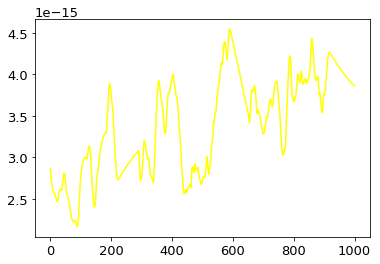

In [26]:
plt.plot(t, flux3*clight*(3440), color = "yellow")

# plot the observed light curve for UVW2 band

In [27]:
#Note I delated the values between 2454270.830 - 2454318.094
time_obs_UVW2 = []
flux_obs_UVW2 = []
fluxerr_obs_UVW2 = []
with open('Filter/UVW2_timeflux1.txt') as f:
    for line in f:
        data = line.split()
        #print float(data[0])
        time_obs_UVW2.append(float(data[0]))
        flux_obs_UVW2.append(float(data[1]))
        fluxerr_obs_UVW2.append(float(data[1]))
time_obs_UVW2 = np.asarray(time_obs_UVW2)
print time_obs_UVW2[0]
time_obs_UVW2 = time_obs_UVW2-2400000
flux_obs_UVW2 = np.asarray(flux_obs_UVW2)
fluxerr_obs_UVW2 = np.asarray(fluxerr_obs_UVW2)
print time_obs_UVW2[0]
time_obs_UVW2 = time_obs_UVW2 - time_obs_UVW2[0]

2455961.73
55961.72999999998


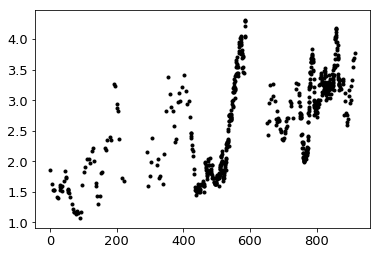

In [28]:
plt.plot(time_obs_UVW2, flux_obs_UVW2, 'k.', linewidth=2.5)

In [29]:
#time_obs = time_obs-time_obs[0]
time_obs_UVW2 = time_obs_UVW2-8 #days 
#print time_obs
mean_flux_obs_UVW2 = mean(flux_obs_UVW2)
print mean_flux_obs_UVW2
flux_obs_UVW2 = flux_obs_UVW2 / mean_flux_obs_UVW2

2.658675


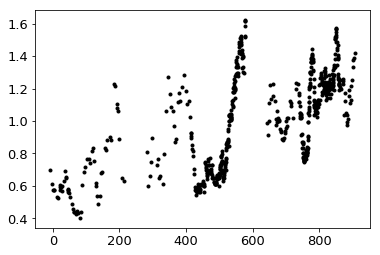

In [30]:
plt.plot(time_obs_UVW2, flux_obs_UVW2, 'k.', linewidth=2.5)

# Compare all the LC of UVW2 (illuminated LC, one realization of disk model, observed)

In [31]:
#time_ILC_start1 = time_ILC + 55900
#t_start = t + 55900
#time_obs_UVW2 = time_obs_UVW2 + 55900
print flux0[100]
Flux_UVW2 = flux0*clight*(2120)*1e14
print Flux_UVW2[100]

4.0136641785714046e-30
0.025526904175714134


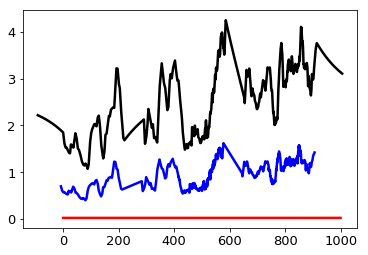

In [32]:
plt.plot(time_ILC, flux_ILC, 'k', linewidth=2.5)
plt.plot(t, Flux_UVW2, 'r', linewidth=2.5)
plt.plot(time_obs_UVW2, flux_obs_UVW2, 'b', linewidth=2.5)
#plt.xlim(55800, 56920)
#plt.ylim(-0.02, 0.02)

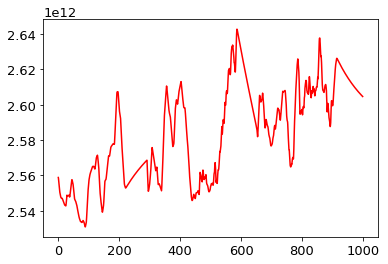

In [33]:
plt.plot(t, Flux_UVW2*1e14, color = "red")

# plot the observed light curve for U band

In [34]:
#Note I delated the values between 2454270.830 - 2454318.094
time_obs = []
flux_obs = []
fluxerr_obs = []
with open('Filter/U_timeflux.txt') as f:
    for line in f:
        data = line.split()
        #print float(data[0])
        time_obs.append(float(data[0]))
        flux_obs.append(float(data[1]))
        fluxerr_obs.append(float(data[1]))
time_obs = np.asarray(time_obs)
print time_obs[0]
time_obs = time_obs-2400000
flux_obs = np.asarray(flux_obs)
fluxerr_obs = np.asarray(fluxerr_obs)
print time_obs[0]
#time_obs = time_obs - time_obs[0]

2456431.67
56431.669999999925


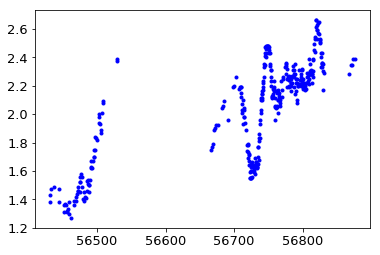

In [35]:
plt.plot(time_obs, flux_obs, 'b.', linewidth=2.5)

In [36]:
#time_obs = time_obs-time_obs[0]
time_obs = time_obs-12.5 #days 
#print time_obs
mean_flux_obs = mean(flux_obs)
print mean_flux_obs
flux_obs = flux_obs / mean_flux_obs

2.033965909090909


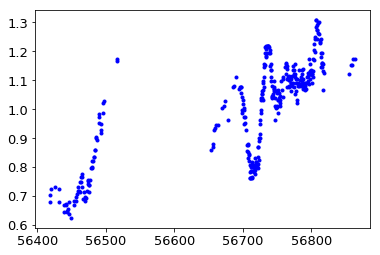

In [37]:
plt.plot(time_obs, flux_obs, 'b.', linewidth=2.5)

# Compare all LC of U band (ILC, one realization of disk model, observed)

In [38]:
time_ILC_start2 = time_ILC + 55900
t_start2 = t + 55900
Flux_U = flux3*clight*(3440)*1e14

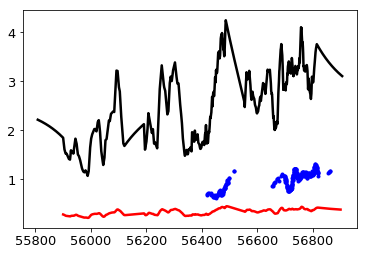

In [39]:
plt.plot(time_ILC_start2, flux_ILC, 'k', linewidth=2.5)
plt.plot(t_start2, Flux_U, 'r', linewidth=2.5)
plt.plot(time_obs, flux_obs, 'b.', linewidth=2.5)
#plt.xlim(56400, 56920)

# Compute one realization of the disk model for each band Without INTEGRATION OVER BAND PASSES

In [40]:
#2) Compute UVW2 LC assuming illuminating source (Flux)
#follow the UVW2 fitted with the acretion disk model
#Filter=np.array([1,1,1,0,1,1])

In [41]:
#ad.AD_py(6,Filter, time, flux, ratio, tau_time, Ntime, Ntau)

In [42]:
t_no = []
flux0_no = []
flux1_no = []
flux2_no = []
flux3_no = []
for i in range(0,2000):
    t_no.append(float(0.5*float(i) + 0.0))
    flux0_no.append(float(0))
    flux1_no.append(float(0))
    flux2_no.append(float(0))
    flux3_no.append(float(0))
t_no = np.asarray(t_no)
flux0_no = np.asarray(flux0_no)
flux1_no = np.asarray(flux1)
flux2_no = np.asarray(flux2)
flux3_no = np.asarray(flux3)

ad.LightCurve_no_integration(time_ILC, flux_ILC, len(time_ILC), t_no, flux0_no, len(t_no), 1.0)
ad.LightCurve_no_integration(time_ILC, flux_ILC, len(time_ILC), t_no, flux1_no, len(t_no), 10.0)
ad.LightCurve_no_integration(time_ILC, flux_ILC, len(time_ILC), t_no, flux2_no, len(t_no), 100.0)
ad.LightCurve_no_integration(time_ILC, flux_ILC, len(time_ILC), t_no, flux3_no, len(t_no), 1000.0)


0

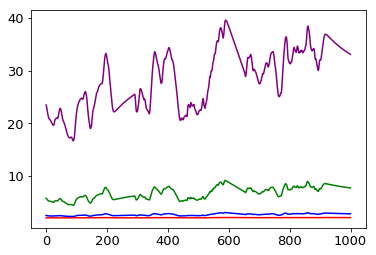

In [43]:
plt.plot(t_no, flux0_no*clight*1e14 , color = "red")
plt.plot(t_no, flux1_no*clight*1e14 , color = "blue")
plt.plot(t_no, flux2_no*clight*1e14 , color = "green")
plt.plot(t_no, flux3_no*clight*1e14 , color = "purple")
#plt.ylim(0.0, 4.)

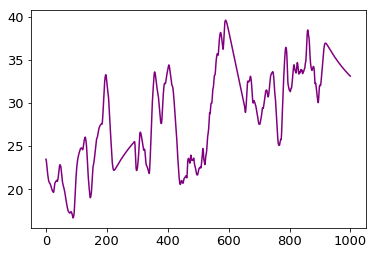

In [44]:
flux_mod = flux3_no*clight*1e14
plt.plot(t_no, flux_mod , color = "purple")

In [45]:
#discard all the values below zero because it effect the result of mean
flux_mod1 = []
time_mod = []
for i in range(len(flux_mod)):
    if flux_mod[i] > 0 and t_no[i] > 0 and t_no[i] < 900:
        flux_mod1.append(flux_mod[i])
        time_mod.append(t_no[i])
        
flux_mod1 = np.asarray(flux_mod1)
time_mod = np.asarray(time_mod)
        
meanf = mean(flux_mod1)
print meanf

27.82908185384582


In [114]:
#Note I delated the values between 2454270.830 - 2454318.094
time_obs_UVW2 = []
flux_obs_UVW2 = []
fluxerr_obs_UVW2 = []
with open('Filter/UVW2_timeflux1.txt') as f: #UVW2_timeflux1.txt #UVM2_timeflux.txt #V_timeflux.txt
    for line in f:
        data = line.split()
        #print float(data[0])
        if(float(data[0]) -2400000-55961.72999999998 > 0  and float(data[0]) -2400000-55961.72999999998 < 900 ):
            time_obs_UVW2.append(float(data[0]))
            flux_obs_UVW2.append(float(data[1]))
            fluxerr_obs_UVW2.append(float(data[1]))
time_obs_UVW2 = np.asarray(time_obs_UVW2)
print time_obs_UVW2[0]
time_obs_UVW2 = time_obs_UVW2-2400000-55961.72999999998
flux_obs_UVW2 = np.asarray(flux_obs_UVW2)
fluxerr_obs_UVW2 = np.asarray(fluxerr_obs_UVW2)
print time_obs_UVW2[0]

2455965.945
4.214999999850988


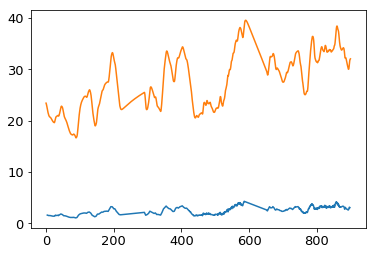

In [115]:
plot(time_obs_UVW2,flux_obs_UVW2)
plot(time_mod,flux_mod1)

In [116]:
# Find mean of observed lc:
mean_obs = mean(flux_obs_UVW2)
print mean_obs
# rescaling means: illuminated LC and observed LC need to have the same mean:
flux_mod_1 = flux_mod1*mean_obs/meanf

2.6505467511885894


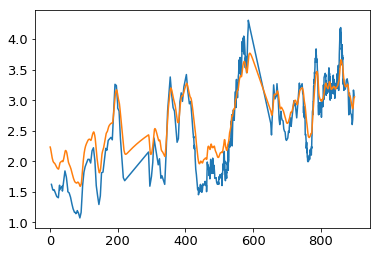

In [117]:
plot(time_obs_UVW2,flux_obs_UVW2)
plot(time_mod, flux_mod_1)

In [118]:
# To change the amplitude we need to make interpolation
# Compute the Amplitudes
#abs is Absolute value (mutlak deger) 
Amplitude_obs = 0.0
for i in range(len(time_obs_UVW2)-1):
    for j in range(i+1,len(time_obs_UVW2)):
        if abs(flux_obs_UVW2[i] - flux_obs_UVW2[j])> Amplitude_obs:
            Amplitude_obs = abs(flux_obs_UVW2[i] - flux_obs_UVW2[j])
            
Amplitude_mod = 0.0
for i in range(len(time_mod)-1):
    for j in range(i+1,len(time_mod)):
        if abs(flux_mod_1[i] - flux_mod_1[j])> Amplitude_mod:
            Amplitude_mod = abs(flux_mod_1[i] - flux_mod_1[j])
            
print Amplitude_obs, Amplitude_mod

3.2399999999999993 2.1822991937219873


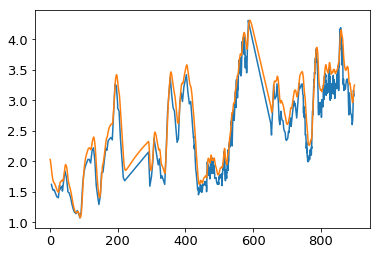

In [119]:
#make interpolation
flux_mod_2 = (flux_mod_1 - mean_obs)*Amplitude_obs/Amplitude_mod + mean_obs 
plot(time_obs_UVW2,flux_obs_UVW2)
plot(time_mod, flux_mod_2)

In [120]:
##print the light curve in a file
#time_mod_UVW2 = time_mod + 5961.72999999998#+4.214999999850988
#flux_mod_UVW2 = flux_mod_2 
#with open('LC_UVW2_reprocessing.txt', 'w') as f:
#    for i in range(len(time_mod)):
#        f.write("%g\t%g\n" % (time_mod_UVW2[i],flux_mod_UVW2[i]))

In [88]:
##print the light curve in a file
#time_mod_UVM2 = time_mod + 5961.72999999998#+469.9440000001341
#flux_mod_UVM2 = flux_mod_2
#with open('LC_UVM2_reprocessing.txt', 'w') as f:
#    for i in range(len(time_mod)):
#        f.write("%g\t%g\n" % (time_mod_UVM2[i],flux_mod_UVM2[i]))

In [121]:
##print the light curve in a file
#time_mod_UVW2 = time_mod + 5961.72999999998#+4.214999999850988
#flux_mod_UVW2 = flux_mod_2 
#with open('LC_V_reprocessing.txt', 'w') as f:
#    for i in range(len(time_mod)):
#        f.write("%g\t%g\n" % (time_mod_UVW2[i],flux_mod_UVW2[i]))

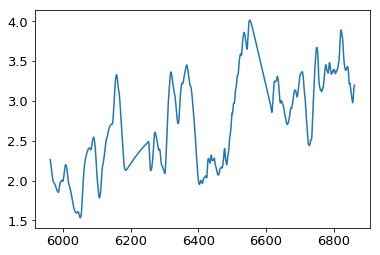

In [122]:
#plot(time_obs_UVW2,flux_obs_UVW2)
plot(time_mod_UVM2, flux_mod_UVM2)

In [123]:
#Compute the new amplitude
Amplitude_mod_new = 0.0
for i in range(len(time_mod)-1):
    for j in range(i+1,len(time_mod)):
        if abs(flux_mod_2[i] - flux_mod_2[j])> Amplitude_mod_new:
            Amplitude_mod_new = abs(flux_mod_2[i] - flux_mod_2[j])

In [124]:
print Amplitude_obs, Amplitude_mod_new

3.2399999999999993 3.239999999999999


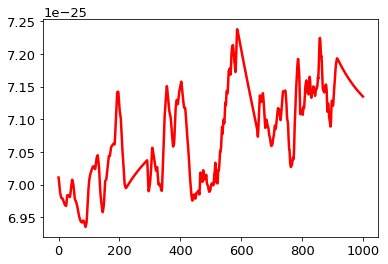

In [54]:
plt.plot(t_no, flux0_no, 'r', linewidth=2.5)
#plt.ylim(3.4e-25, 3.5e-25)

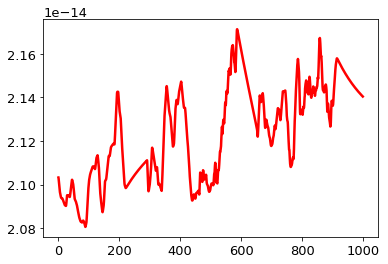

In [55]:
plt.plot(t_no, flux0_no*clight, 'r', linewidth=2.5)
#plt.ylim(1.025e-14, 1.055e-14)

In [56]:
flux0_no[150]*clight*(2120)

4.415653401672976e-11

In [57]:
(2120*1e-10)

2.1200000000000002e-07

# Compare all LC of UVW2 (ILC, one realization of disk model, observed)

In [58]:
time_ILC_start3 = time_ILC + 55900
t_no_start = t_no + 55900
#time_obs_UVW2 = time_obs_UVW2 + 55900
Flux_UVW2 = flux0_no*clight*1e14 

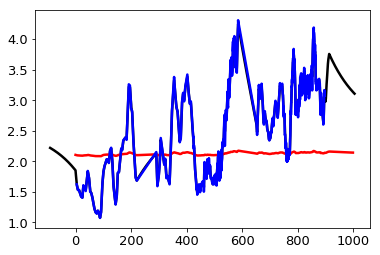

In [59]:
plt.plot(time_ILC, flux_ILC, 'k', linewidth=2.5)
plt.plot(t_no, Flux_UVW2, 'r', linewidth=2.5)
plt.plot(time_obs_UVW2, flux_obs_UVW2, 'b', linewidth=2.5)
#plt.xlim(55800, 56920)
#plt.ylim(1.0, 1.2)